# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [10]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


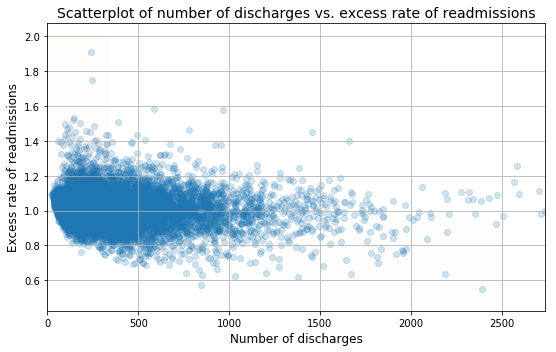

In [16]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Part A

I agree with the claim that the overall, rate of readmissions is trending down with increasing number of discharges. However, the correlation -0.09 calculated on the correlation these two variables in the entire dataset is not very strong. The claims that excess rate of readmissions (area shaded red) and that there is a greater incidence of lower rates of readmissions (area shaded green), come under even greaterscrutiny. Pearson r tests of these two variables for subsets of the data where discharge values are below 350 or over 800 are lower than the pearson r value of the entire dataset. This indicates that statistically, there is actually less of a correlation between the excess readmission ratio and discharges variables for data points that are above or below these thresholds.  

The statistics cited in Part B are true, and they do have statistical relevance given that the sample size of the data is large. 

As is shown in the pearson r correlation test in the cell below between the two variables, the assertion that there is a statistcally significant correlation between excess readmission ratio and the number of discharges is true, given that the p-value is way below an alpha level of .05 or even .01. The supposition that maller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions could be true, however, a test of correlation between excess readmission ratios and number of discharges - under the assumption that number of discharges is a proxy for hospital size where a larger hospital means more discharges and a smaller hospital means less discharges - is not enough to say that a lack of resources alone, or a lack of resources at all is contributing to higher readmission ratios, all this given a very weak correlation between the two variables in question. 

I agree with the recommendation that hospitals with a capacity below a certain threshold should undergo some form of evaluation. Whether or not this evaluation is based on hospital resources will require further statistical analysis. A good place to start would be to see if their is a correlation between hospital capacity and readmissions, rather than using discharges as a proxy for hospital capacity. I am also in partial agreement with the recommendation that hospitals should look to consolidate facilities, but again, further statistical analysis is needed, at the very least in the spatial distribution of hospitals. For example, a hospital serving a rural population should not be consolidated with other hospitals in an adjacent urban area, as this would make care for rural populations inaccessible.



In [4]:
from scipy import stats
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Readmissions'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df.loc[:, 'Number of Readmissions'] = clean_hospital_read_df['Number of Readmissions'].astype(float)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
df = clean_hospital_read_df
index_list = list(range(len(df.index)))
# make index series a column in dataframe
df['index'] = index_list
# set index column as index of dataframe
df = df.set_index(['index'])
df['Excess Readmission Ratio']  = df['Excess Readmission Ratio'].replace(np.NaN, 'missing')
df['Excess Readmission Ratio']  = df['Excess Readmission Ratio'].replace(np.NaN, 'missing')

df = df.loc[df['Excess Readmission Ratio'] != "NaN"]
#masks = df['Number of Discharges'] < 100
#df = df[masks]
masks = df['Excess Readmission Ratio'] != "missing"
df = df[masks]
mask = df != "missing"
df[mask]
under_350 = df.loc[df['Number of Discharges'] < 350]
over_800 = df.loc[df['Number of Discharges'] > 800]
print (len(under_350), len(df))

print("Correlation between all discharges and all readmissions ratio", stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio']))
print ("Correlation between discharges under 350 and their corresponding readmissions ratios",  stats.pearsonr(under_350['Number of Discharges'], under_350['Excess Readmission Ratio']))
print ("Correlation between discharges over 800 and their corresponding readmissions ratios",  stats.pearsonr(over_800['Number of Discharges'], over_800['Excess Readmission Ratio']))


C:\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


6998 11497
Correlation between all discharges and all readmissions ratio (-0.097397943510793561, 1.222547377680967e-25)
Correlation between discharges under 350 and their corresponding readmissions ratios (-0.044579916548617954, 0.00019111613905514624)
Correlation between discharges over 800 and their corresponding readmissions ratios (-0.086504171183548723, 0.0094607460436546657)


1. Set up an appropriate hypothesis test

Null Hypothesis: There is no difference between the means of the subsets of hospital data with excess readmissions above 1.0 and below 1.0 respectively. 

Alternative Hypothesis: There is a difference between the means of the subsets of hospital data with excess readmissions above 1.0 and below 1.0 respectively. 

In [7]:
over1 = clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'] > 1.0]
below1 = clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'] < 1.0]

In [11]:
over1_discharge = over1["Number of Discharges"]
below1_discharge = below1["Number of Discharges"]

2) Compute p-value

In [12]:
# define function to simulate two-sampled z-test of different means
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy import stats
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - stats.norm.cdf(abs(z)))
    return z, pval



In [19]:
# sample mean 1
X1 = np.mean(over1_discharge)
# sample mean 2
X2 = np.mean(below1_discharge)
# mu difference of the true male and female population is not available in this case
mudiff = 0
# sample std 1
sd1 = np.std(over1_discharge)
# sample std 2
sd2 = np.std(below1_discharge)
# sample population size 1 
n1 = len(over1_discharge)
# sample population size 2
n2 = len(below1_discharge)
# run function 
z, p = twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2)
print ("p-value:", p)


p-value: 8.9947675086e-08


4) Discuss statistical significance and practical significance

The p-value obtained through the z-test difference of sample means test suggests that there is a difference between the mean number of discharges between hospitals above and below an excess readmission ratio of 1.0. This statistical analysis allows for two inferences about the data, the first being that the threshold of excess readmissions ratio of 1.0, established by Medicare policies is a good indicator of possible differences in performance among hospitals. The second inference that can be drawn from this test is that a policy approach should apply different treatments to groups above and below the 1.0 threshold. However, a more sound analysis would involve data on hospital occupancy, rather than using the number of discharges as a proxy for hospital occupancy. Additionally, a chi-squared test of difference can be performed on the proportion of hospital readmissions for each of the five medical conditions to determine if one or several conditions suggest a statistically significant difference in readmission rates. In addition, an analysis might further subset the data to look at the top 25th percentile of offending hospitals and apply a difference of means test to the the 50-75th percentile and 75th-100th percentile on the number of discharges or hospital capacity variable if available.

Policy suggestions based on this analysis would involve auditing the medical technology and doctors with specializations in these areas for certain hospitals. Hospitals above the excess readmission rate of 1.0 can receive aid to improve their resources in doctors or technology depending on the proportion of the most demanding medical conditions that they receive. However, it is important with policy recommendations and statistical analysis to consider the difference between practical signifiance and statistical significance. That is to say, statistical significance may suggest evidence that a certain phenomenon is in need of a remedy. Practical signifiance, however, will always determine the course of action. Using the remedy suggested here as an example - that hospitals lacking resources should be given aid depending on the demand for these reasources that they have due to the admission of patients with certain medical conditions, - faces cost-related and bureaucratic obstacles. That is to say 1) does the federal government have the money to spend on providing aid to upgrade resources? The answer is likely, no. 2) Is it considered the prerogative of the government to use money from the budget to pay for this aid?

Factors of cost, time and benefit may change the policy recommendations given to a client. In the case of hospital readmissions, recommendations will depend on the availability of resources that the federal government or hospitals have, and the timeframe given by legislation to implement these policies. 

5) Examine Scatterplot

Some of the advantages of the above scatterplot is that it is able to convey somewhat of a correlation between excess readmissions ratio and and the number of discharges. But most of the data points are clustered in the same area of the plot, so it is difficult to perceive this correlation initially unless some of the data points at extreme ends of the plot are examined. The green and red transparent colors are also misleading about the plot for reasons that were further discussed that the bounds of less than 300 discharges and greater than 800 actually produce a smaller slope of linear relationship between excess readmissions and discharges than the dataset as a whole. The histogram displayed above is an alternative way to display the data. It paints a cleaner picture of the way that the data is skewed right, with very few discharge rates above 1000 compared with those below 1000. 






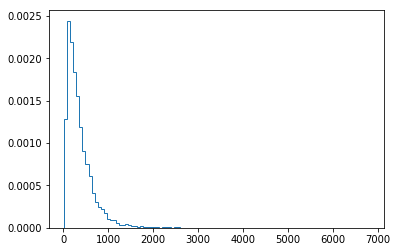

In [17]:
import matplotlib.pyplot as plt
# plot the temperature column containing the sample distribution


_ = plt.hist(df['Number of Discharges'], bins = 100, normed=True, histtype = 'step')
plt.show()
